In [129]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [131]:
#Reading the data
import h5py
data = h5py.File('/content/drive/My Drive/Colab Notebooks/Autonomous_Vehicles_SVHN_single_grey1 (1).h5',mode='a')

In [132]:
#Printing the keys of the file
print(data.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


In [133]:
#Splitting the data into X_train, X_test, Y_train, Y_test,x_val,y_val
x_train = data['X_train'][:]
x_test = data['X_test'][:]
y_train = data['y_train'][:]
y_test = data['y_test'][:]

In [134]:
#Printing the shape of all the 4 variable
print("shape of x_train:",x_train.shape)
print("shape of x_test:", x_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of x_train: (42000, 32, 32)
shape of x_test: (18000, 32, 32)
shape of y_train: (42000,)
shape of y_test: (18000,)


All 4 data are in sync.

label of the image: 2


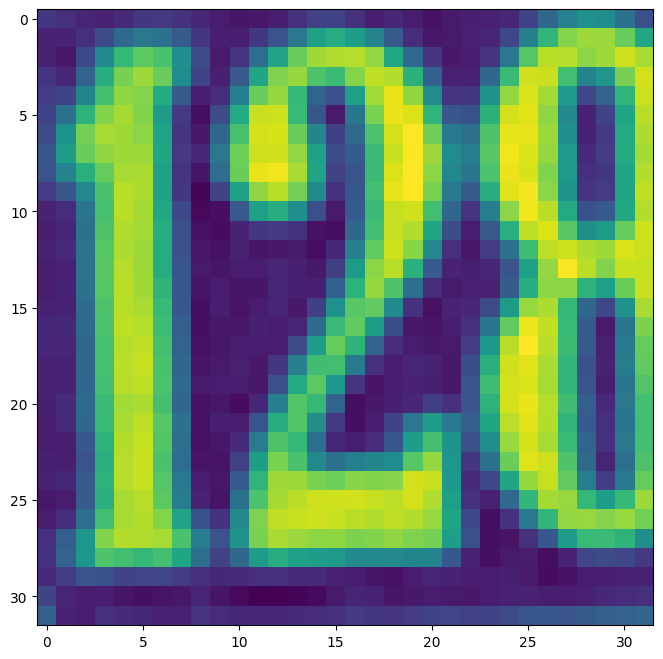

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_train[0])
print("label of the image:",y_train[0])

label of the image: 6


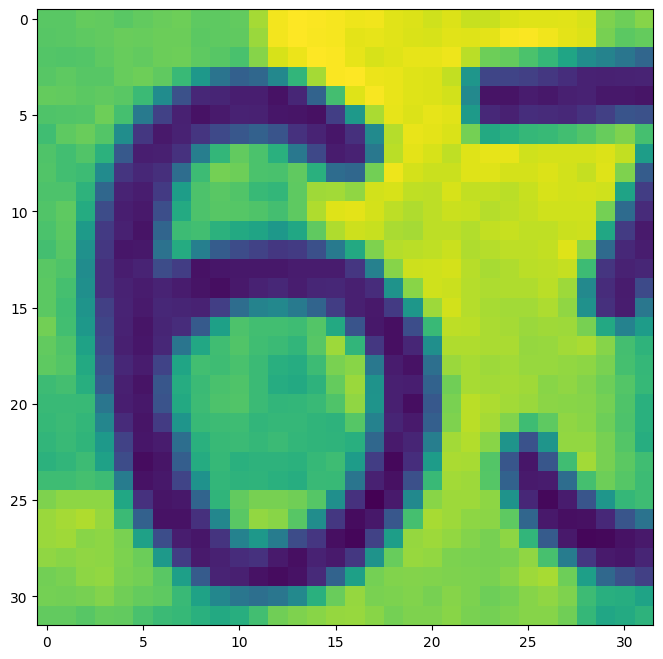

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_train[1])
print("label of the image:",y_train[1])

label of the image: 7


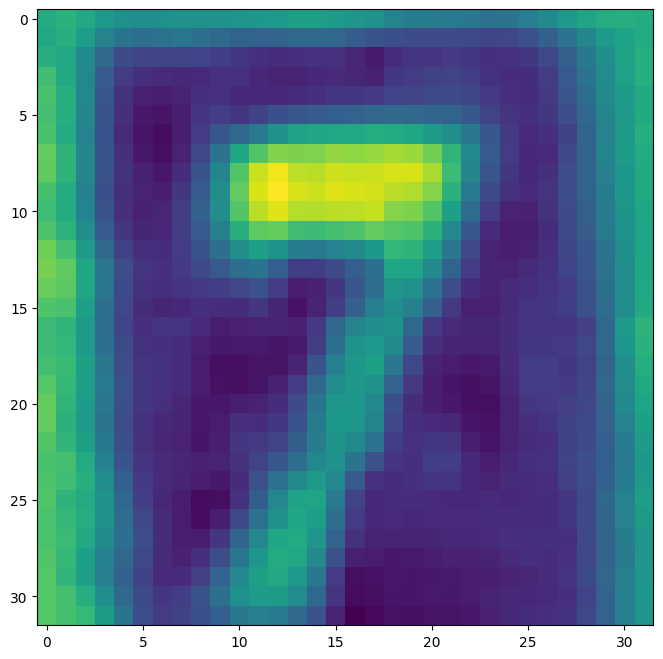

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_train[2])
print("label of the image:",y_train[2])

label of the image: 4


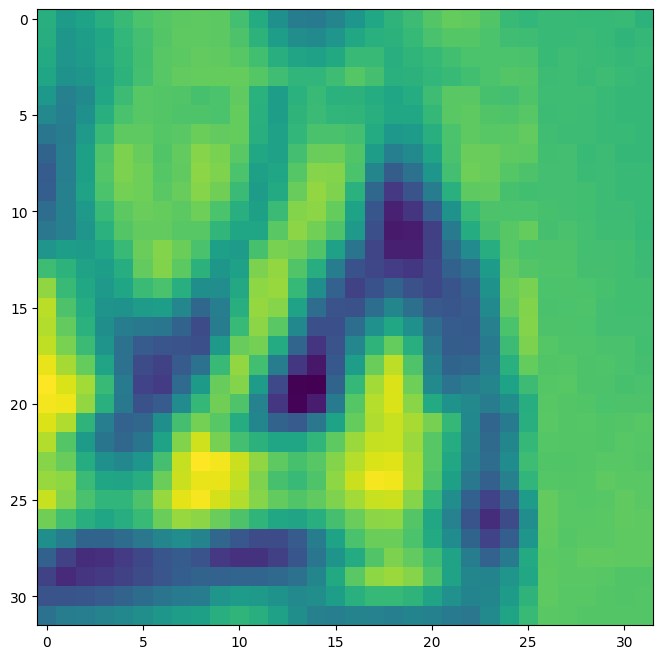

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_train[3])
print("label of the image:",y_train[3])

label of the image: 4


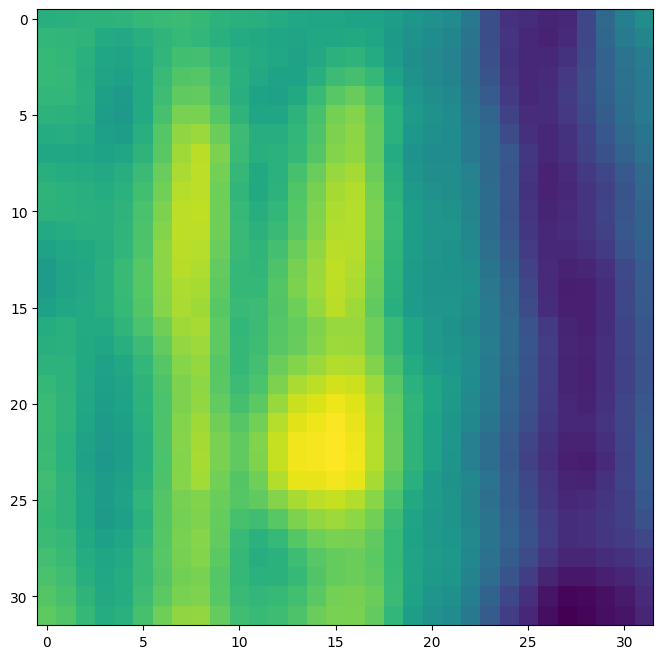

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_train[4])
print("label of the image:",y_train[4])

label of the image: 0


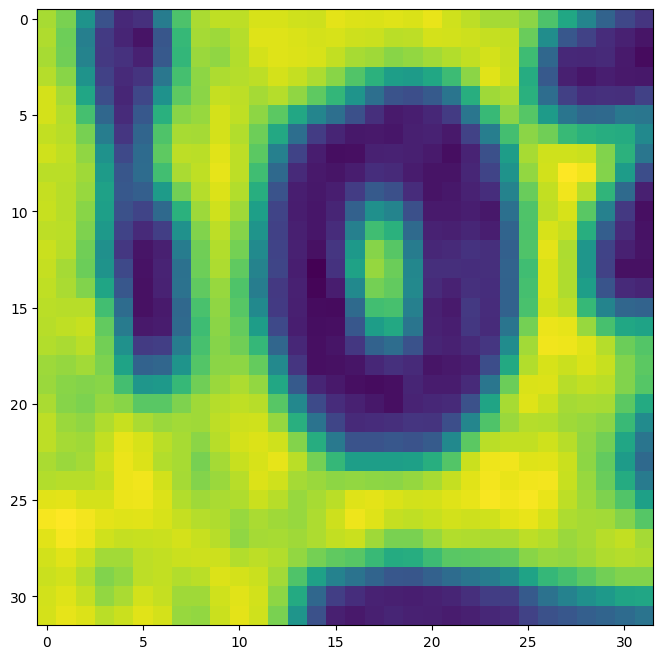

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_train[5])
print("label of the image:",y_train[5])

label of the image: 3


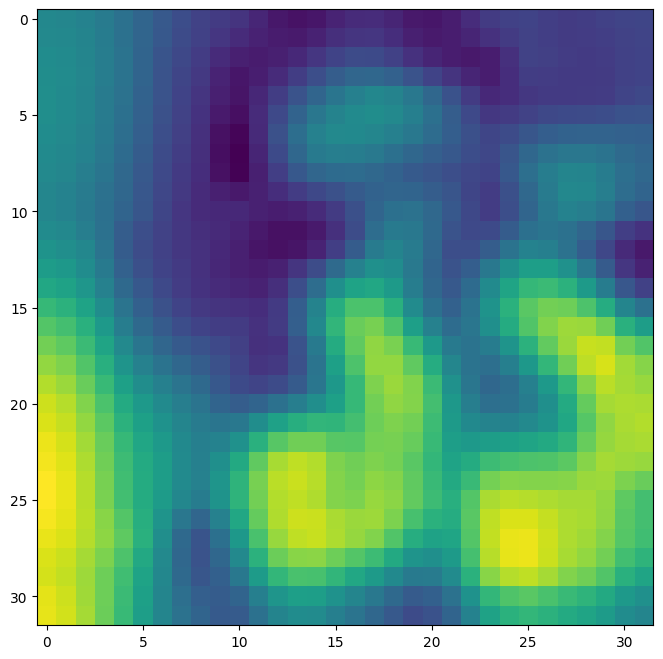

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_train[6])
print("label of the image:",y_train[6])

label of the image: 0


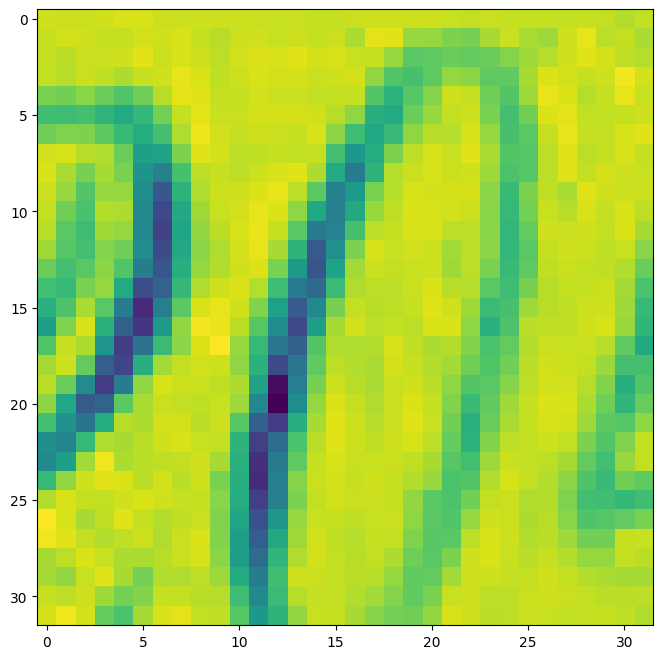

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_train[7])
print("label of the image:",y_train[7])

label of the image: 7


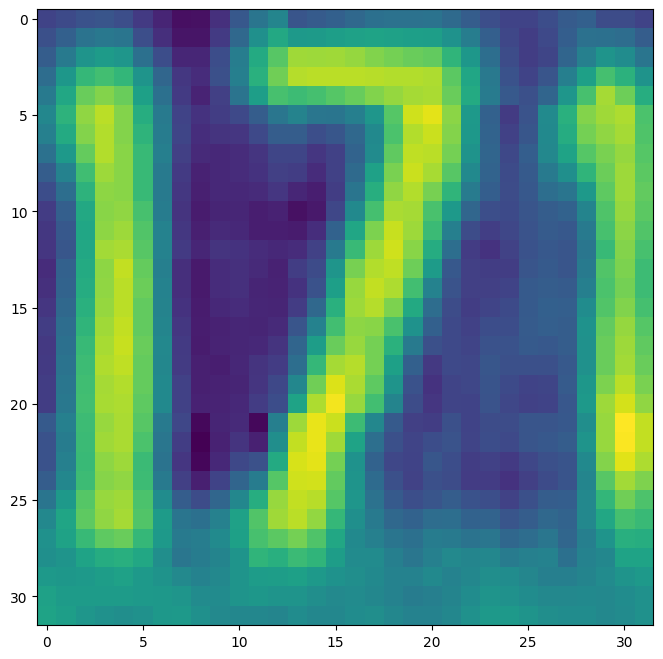

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_train[8])
print("label of the image:",y_train[8])

label of the image: 3


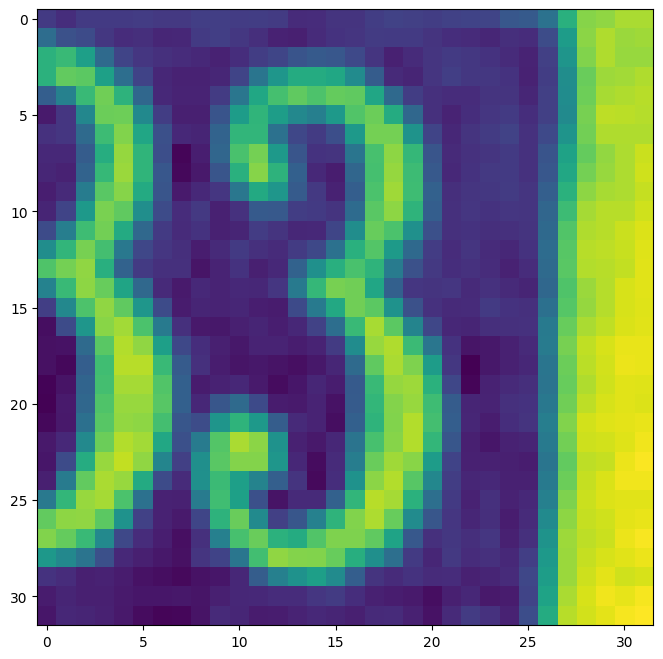

In [ ]:
plt.figure(figsize=(20,8))
plt.imshow(x_train[9])
print("label of the image:",y_train[9])

In [135]:
#Reshaping the images
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

In [136]:
#Normalizing the pixel values
x_train = x_train/255.0
x_test = x_test/255.0

In [137]:
#Transforming the target variable
y_train = tf.keras.utils.to_categorical(y_train)

In [138]:
#Printing the total number of class
y_train.shape

(42000, 10)

We can see that, after transforming the target variable, it has 10 columns. i.e there are 10 classes in the dataset.

**MODEL TRAINING AND EVALUATION**

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

Model 1

In [ ]:
#Developing the model
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model1.add(tf.keras.layers.MaxPool2D())
model1.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model1.add(tf.keras.layers.MaxPool2D())
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.4))
model1.add(tf.keras.layers.Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(tf.keras.layers.Dropout(0.4))
model1.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
#compile the model
model1.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training the model
history=model1.fit(x_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size=32,verbose=1)

Epoch 1/100
1050/1050 [==============================] - 8s 5ms/step - loss: 1.9969 - accuracy: 0.2616 - val_loss: 1.2498 - val_accuracy: 0.6196
Epoch 2/100
1050/1050 [==============================] - 5s 4ms/step - loss: 1.2672 - accuracy: 0.5685 - val_loss: 0.7792 - val_accuracy: 0.7813
Epoch 3/100
1050/1050 [==============================] - 8s 7ms/step - loss: 1.0148 - accuracy: 0.6658 - val_loss: 0.6704 - val_accuracy: 0.8075
Epoch 4/100
1050/1050 [==============================] - 8s 7ms/step - loss: 0.9186 - accuracy: 0.7055 - val_loss: 0.6019 - val_accuracy: 0.8327
Epoch 5/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.8519 - accuracy: 0.7294 - val_loss: 0.5966 - val_accuracy: 0.8338
Epoch 6/100
1050/1050 [==============================] - 5s 4ms/step - loss: 0.8125 - accuracy: 0.7453 - val_loss: 0.5704 - val_accuracy: 0.8369
Epoch 7/100
1050/1050 [==============================] - 6s 5ms/step - loss: 0.7789 - accuracy: 0.7573 - val_loss: 0.5359 - val_ac

Text(0.5, 1.0, 'Accuracy vs Val_Accuracy')

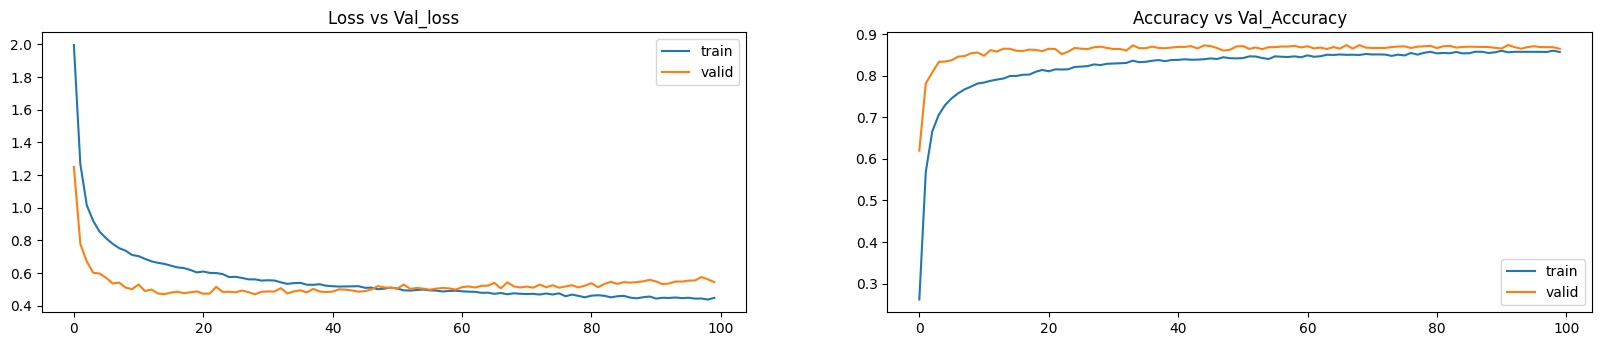

In [ ]:
hist1 = pd.DataFrame(history.history)
hist1['epoch'] = history.epoch

# Plotting accuracy and loss at different epochs
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Loss vs Val_loss")
plt.subplot(2,2,2)
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Accuracy vs Val_Accuracy")


In [ ]:
#prediction for y_test
y_prob= model1.predict(x_test)
y_pred=np.argmax(y_prob,axis=1)
y_pred

563/563 [==============================] - 1s 2ms/step


array([1, 7, 2, ..., 7, 8, 2])

<Axes: >

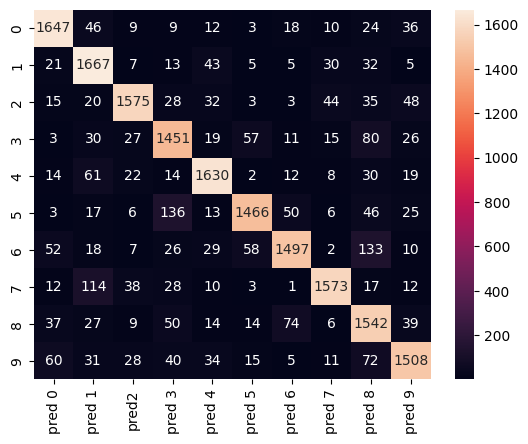

In [ ]:
#Printing he confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm,index =['0','1','2','3','4','5','6','7','8','9'], columns=['pred 0','pred 1','pred2','pred 3','pred 4','pred 5','pred 6','pred 7','pred 8','pred 9']),annot=True,fmt='0.4g')

In [ ]:
#Printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1814
           1       0.82      0.91      0.86      1828
           2       0.91      0.87      0.89      1803
           3       0.81      0.84      0.83      1719
           4       0.89      0.90      0.89      1812
           5       0.90      0.83      0.86      1768
           6       0.89      0.82      0.85      1832
           7       0.92      0.87      0.90      1808
           8       0.77      0.85      0.81      1812
           9       0.87      0.84      0.85      1804

    accuracy                           0.86     18000
   macro avg       0.87      0.86      0.86     18000
weighted avg       0.87      0.86      0.86     18000



In [ ]:
#Printing the scores
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
print("roc auc score:", roc_auc_score(y_test,y_prob, multi_class='ovr'))
print("precision score:",precision_score(y_test,y_pred,average='weighted'))
print("recall score:", recall_score(y_test,y_pred,average='weighted'))
print("f1 score:", f1_score(y_test,y_pred, average='weighted'))
print("Accuracy score:", accuracy_score(y_test,y_pred))

roc auc score: 0.9868299862529184
precision score: 0.8670525593229693
recall score: 0.8642222222222222
f1 score: 0.8646375247767616
Accuracy score: 0.8642222222222222


We can see that both loss and accuracy score graph is close to each other for both training and validation data.

Also we get good f1 score and accuracy score. We can go ahead with the model.

But lets increase the complexity of the model to improve further.

Model2


In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#DEveloping model 2
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(tf.keras.layers.MaxPool2D())
model2.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model2.add(tf.keras.layers.MaxPool2D())
#model2.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
#model2.add(tf.keras.layers.MaxPool2D())
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(tf.keras.layers.Dropout(0.4))
model2.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
#compile the model
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training the model
history1=model2.fit(x_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size=32,verbose=1)

Epoch 1/100
1050/1050 [==============================] - 8s 6ms/step - loss: 2.2369 - accuracy: 0.1382 - val_loss: 1.5052 - val_accuracy: 0.5235
Epoch 2/100
1050/1050 [==============================] - 5s 5ms/step - loss: 1.1601 - accuracy: 0.6178 - val_loss: 0.6378 - val_accuracy: 0.8194
Epoch 3/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.7789 - accuracy: 0.7565 - val_loss: 0.5678 - val_accuracy: 0.8352
Epoch 4/100
1050/1050 [==============================] - 8s 8ms/step - loss: 0.6849 - accuracy: 0.7924 - val_loss: 0.5126 - val_accuracy: 0.8517
Epoch 5/100
1050/1050 [==============================] - 10s 10ms/step - loss: 0.6249 - accuracy: 0.8099 - val_loss: 0.4974 - val_accuracy: 0.8538
Epoch 6/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.5902 - accuracy: 0.8224 - val_loss: 0.4696 - val_accuracy: 0.8621
Epoch 7/100
1050/1050 [==============================] - 6s 6ms/step - loss: 0.5614 - accuracy: 0.8293 - val_loss: 0.4616 - val_

Text(0.5, 1.0, 'Accuracy vs Val_Accuracy')

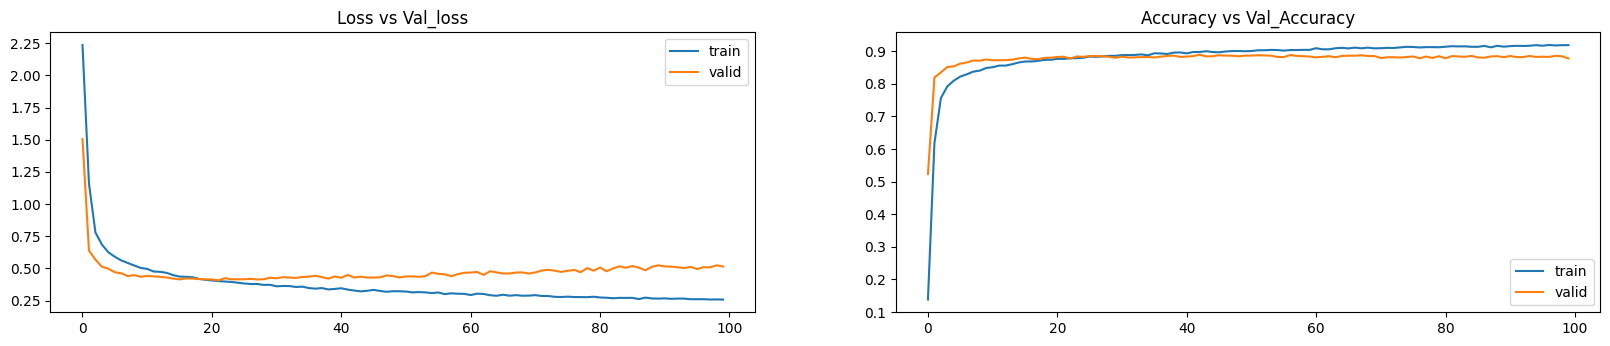

In [ ]:
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

# Plotting accuracy and loss at different epochs
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Loss vs Val_loss")
plt.subplot(2,2,2)
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Accuracy vs Val_Accuracy")


In [ ]:
#prediction for y_test
y_prob= model2.predict(x_test)
y_pred=np.argmax(y_prob,axis=1)
y_pred

563/563 [==============================] - 1s 2ms/step


array([1, 7, 2, ..., 7, 3, 2])

<Axes: >

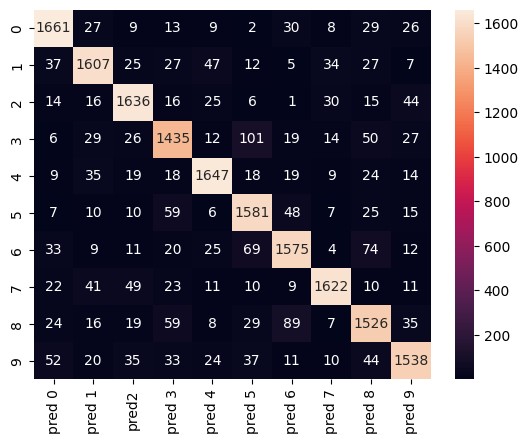

In [ ]:
#Printing he confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm,index =['0','1','2','3','4','5','6','7','8','9'], columns=['pred 0','pred 1','pred2','pred 3','pred 4','pred 5','pred 6','pred 7','pred 8','pred 9']),annot=True,fmt='0.4g')

In [ ]:
#Printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1814
           1       0.89      0.88      0.88      1828
           2       0.89      0.91      0.90      1803
           3       0.84      0.83      0.84      1719
           4       0.91      0.91      0.91      1812
           5       0.85      0.89      0.87      1768
           6       0.87      0.86      0.87      1832
           7       0.93      0.90      0.91      1808
           8       0.84      0.84      0.84      1812
           9       0.89      0.85      0.87      1804

    accuracy                           0.88     18000
   macro avg       0.88      0.88      0.88     18000
weighted avg       0.88      0.88      0.88     18000



In [ ]:
#Printing the scores
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
print("roc auc score:", roc_auc_score(y_test,y_prob, multi_class='ovr'))
print("precision score:",precision_score(y_test,y_pred,average='weighted'))
print("recall score:", recall_score(y_test,y_pred,average='weighted'))
print("f1 score:", f1_score(y_test,y_pred, average='weighted'))
print("Accuracy score:", accuracy_score(y_test,y_pred))

roc auc score: 0.9879414416503339
precision score: 0.8796600026344572
recall score: 0.8793333333333333
f1 score: 0.8793318180624499
Accuracy score: 0.8793333333333333


we can see performance of the model goes down. So we can go ahead with the first model.

Model3

In [ ]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#DEveloping model 3
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model3.add(tf.keras.layers.MaxPool2D())
model3.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model3.add(tf.keras.layers.MaxPool2D())
model3.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model3.add(tf.keras.layers.MaxPool2D())
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
model3.add(tf.keras.layers.Dropout(0.4))
model3.add(tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_uniform'))
model3.add(tf.keras.layers.Dropout(0.4))
model3.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [ ]:
#compile the model
model3.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#Training the model
history1=model3.fit(x_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size=32,verbose=1)

Epoch 1/100
1050/1050 [==============================] - 8s 5ms/step - loss: 2.3031 - accuracy: 0.0997 - val_loss: 2.3048 - val_accuracy: 0.0969
Epoch 2/100
1050/1050 [==============================] - 7s 7ms/step - loss: 1.8024 - accuracy: 0.3418 - val_loss: 1.0545 - val_accuracy: 0.6670
Epoch 3/100
1050/1050 [==============================] - 5s 5ms/step - loss: 1.0219 - accuracy: 0.6682 - val_loss: 0.6977 - val_accuracy: 0.7896
Epoch 4/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.7775 - accuracy: 0.7581 - val_loss: 0.5881 - val_accuracy: 0.8223
Epoch 5/100
1050/1050 [==============================] - 7s 6ms/step - loss: 0.6746 - accuracy: 0.7948 - val_loss: 0.5198 - val_accuracy: 0.8460
Epoch 6/100
1050/1050 [==============================] - 5s 5ms/step - loss: 0.6107 - accuracy: 0.8147 - val_loss: 0.5129 - val_accuracy: 0.8432
Epoch 7/100
1050/1050 [==============================] - 6s 6ms/step - loss: 0.5752 - accuracy: 0.8272 - val_loss: 0.4726 - val_ac

Text(0.5, 1.0, 'Accuracy vs Val_Accuracy')

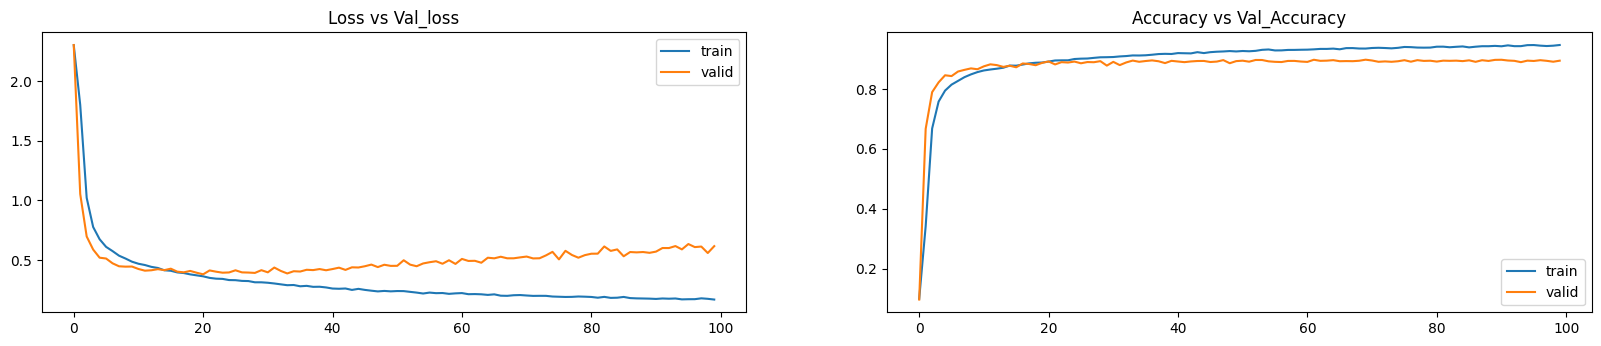

In [ ]:
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

# Plotting accuracy and loss at different epochs
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Loss vs Val_loss")
plt.subplot(2,2,2)
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Accuracy vs Val_Accuracy")


In [ ]:
#prediction for y_test
y_prob= model3.predict(x_test)
y_pred=np.argmax(y_prob,axis=1)
y_pred

563/563 [==============================] - 3s 5ms/step


array([1, 7, 2, ..., 7, 8, 2])

<Axes: >

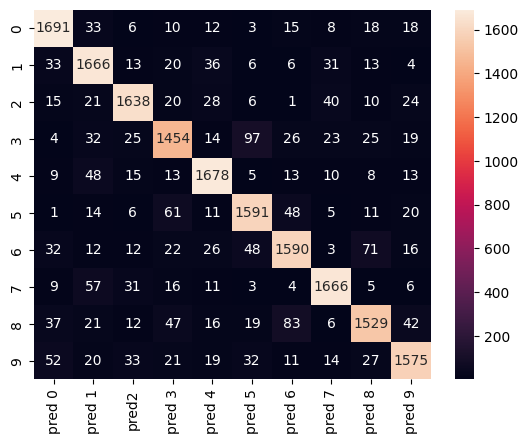

In [ ]:
#Printing he confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm,index =['0','1','2','3','4','5','6','7','8','9'], columns=['pred 0','pred 1','pred2','pred 3','pred 4','pred 5','pred 6','pred 7','pred 8','pred 9']),annot=True,fmt='0.4g')

In [ ]:
#Printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1814
           1       0.87      0.91      0.89      1828
           2       0.91      0.91      0.91      1803
           3       0.86      0.85      0.85      1719
           4       0.91      0.93      0.92      1812
           5       0.88      0.90      0.89      1768
           6       0.88      0.87      0.88      1832
           7       0.92      0.92      0.92      1808
           8       0.89      0.84      0.87      1812
           9       0.91      0.87      0.89      1804

    accuracy                           0.89     18000
   macro avg       0.89      0.89      0.89     18000
weighted avg       0.89      0.89      0.89     18000



In [ ]:
#Printing the scores
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
print("roc auc score:", roc_auc_score(y_test,y_prob, multi_class='ovr'))
print("precision score:",precision_score(y_test,y_pred,average='weighted'))
print("recall score:", recall_score(y_test,y_pred,average='weighted'))
print("f1 score:", f1_score(y_test,y_pred, average='weighted'))
print("Accuracy score:", accuracy_score(y_test,y_pred))

roc auc score: 0.9908729720091175
precision score: 0.8933329360966066
recall score: 0.8932222222222223
f1 score: 0.8930507127123329
Accuracy score: 0.8932222222222223


Model4

In [139]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(43)
import random
random.seed(43)
tf.random.set_seed(43)

In [140]:
#DEveloping model 4
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model4.add(tf.keras.layers.MaxPool2D())
model4.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model4.add(tf.keras.layers.MaxPool2D())
model4.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same'))
model4.add(tf.keras.layers.MaxPool2D())
model4.add(tf.keras.layers.Flatten())
model4.add(tf.keras.layers.Dense(128,activation='relu',kernel_initializer='he_uniform'))
model4.add(tf.keras.layers.Dropout(0.4))
model4.add(tf.keras.layers.Dense(64,activation='relu',kernel_initializer='he_uniform'))
model4.add(tf.keras.layers.Dropout(0.4))
model4.add(tf.keras.layers.Dense(32,activation='relu',kernel_initializer='he_uniform'))
model4.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [142]:
#compile the model
model4.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [143]:
#Training the model
history1=model4.fit(x_train, y_train,
          validation_split=0.2,
          epochs=100,
          batch_size=32,verbose=1)

Epoch 1/100
1050/1050 [==============================] - 8s 6ms/step - loss: 2.2872 - accuracy: 0.1115 - val_loss: 2.0399 - val_accuracy: 0.2469
Epoch 2/100
1050/1050 [==============================] - 7s 6ms/step - loss: 1.4320 - accuracy: 0.4947 - val_loss: 0.9378 - val_accuracy: 0.6995
Epoch 3/100
1050/1050 [==============================] - 6s 6ms/step - loss: 0.8900 - accuracy: 0.7154 - val_loss: 0.6377 - val_accuracy: 0.8123
Epoch 4/100
1050/1050 [==============================] - 11s 10ms/step - loss: 0.7243 - accuracy: 0.7777 - val_loss: 0.5432 - val_accuracy: 0.8331
Epoch 5/100
1050/1050 [==============================] - 11s 10ms/step - loss: 0.6420 - accuracy: 0.8062 - val_loss: 0.5123 - val_accuracy: 0.8458
Epoch 6/100
1050/1050 [==============================] - 7s 6ms/step - loss: 0.5909 - accuracy: 0.8212 - val_loss: 0.4891 - val_accuracy: 0.8554
Epoch 7/100
1050/1050 [==============================] - 7s 7ms/step - loss: 0.5544 - accuracy: 0.8323 - val_loss: 0.4720 - va

Text(0.5, 1.0, 'Accuracy vs Val_Accuracy')

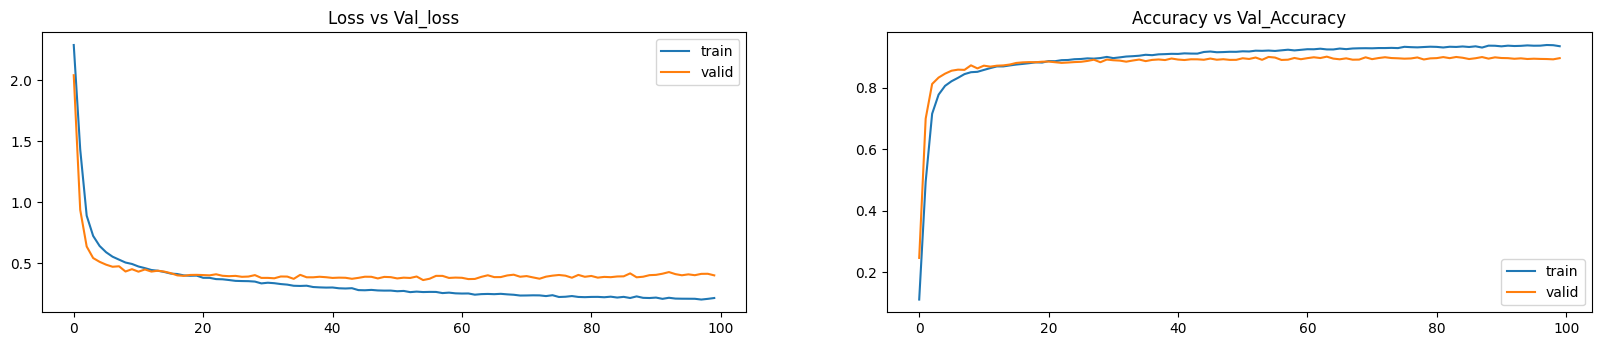

In [144]:
hist1 = pd.DataFrame(history1.history)
hist1['epoch'] = history1.epoch

# Plotting accuracy and loss at different epochs
plt.figure(figsize=(20,8))
plt.subplot(2,2,1)
plt.plot(hist1['loss'])
plt.plot(hist1['val_loss'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Loss vs Val_loss")
plt.subplot(2,2,2)
plt.plot(hist1['accuracy'])
plt.plot(hist1['val_accuracy'])
plt.legend(("train" , "valid") , loc =0)
plt.title("Accuracy vs Val_Accuracy")


In [149]:
#prediction for y_test
y_prob= model4.predict(x_test)
y_pred=np.argmax(y_prob,axis=1)
y_pred

563/563 [==============================] - 1s 2ms/step


array([1, 7, 2, ..., 7, 8, 2])

<Axes: >

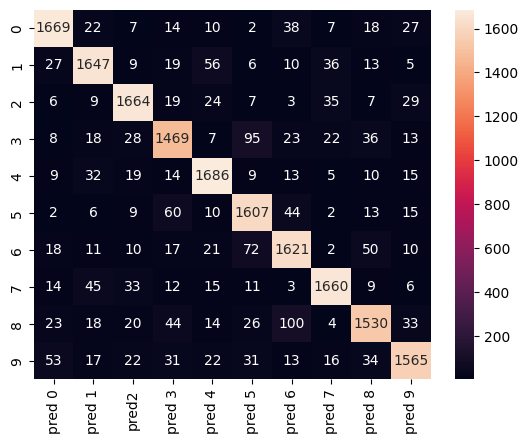

In [150]:
#Printing he confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cm,index =['0','1','2','3','4','5','6','7','8','9'], columns=['pred 0','pred 1','pred2','pred 3','pred 4','pred 5','pred 6','pred 7','pred 8','pred 9']),annot=True,fmt='0.4g')

In [151]:
#Printing the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1814
           1       0.90      0.90      0.90      1828
           2       0.91      0.92      0.92      1803
           3       0.86      0.85      0.86      1719
           4       0.90      0.93      0.92      1812
           5       0.86      0.91      0.88      1768
           6       0.87      0.88      0.88      1832
           7       0.93      0.92      0.92      1808
           8       0.89      0.84      0.87      1812
           9       0.91      0.87      0.89      1804

    accuracy                           0.90     18000
   macro avg       0.90      0.90      0.90     18000
weighted avg       0.90      0.90      0.90     18000



In [152]:
#Printing the scores
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
print("roc auc score:", roc_auc_score(y_test,y_prob, multi_class='ovr'))
print("precision score:",precision_score(y_test,y_pred,average='weighted'))
print("recall score:", recall_score(y_test,y_pred,average='weighted'))
print("f1 score:", f1_score(y_test,y_pred, average='weighted'))
print("Accuracy score:", accuracy_score(y_test,y_pred))

roc auc score: 0.9906266868893429
precision score: 0.8956734259069613
recall score: 0.8954444444444445
f1 score: 0.8953464422832758
Accuracy score: 0.8954444444444445


We get better performance in model4, we can go ahead with it.

In [ ]:
#Saving both the model
model1.save('/content/drive/My Drive/Colab Notebooks/model1_svhn.hdf5')
model2.save('/content/drive/My Drive/Colab Notebooks/model2_svhn.hdf5')
model3.save('/content/drive/My Drive/Colab Notebooks/model3_svhn.hdf5')

In [154]:
model4.save('/content/drive/My Drive/Colab Notebooks/model4_svhn.hdf5')